In [ ]:
import numpy as np
import pandas as pd
import random
 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import BatchNormalization 
from tensorflow.keras import activations 
from tensorflow.keras.layers import MaxPool1D, MaxPool2D, Activation, Conv1D, InputLayer, Conv2D, Dense, Dropout, Flatten,MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow import keras
import re
import matplotlib.pyplot as plt

# <center> Data Generation

In [ ]:
seq_length = 200
motif_length = 20
temp_bp = ' '

sequences_char = list()

# Generating random sequences of length  200
for i in range(2500):
    sequence_char = np.array([])

    
    for j in range(766):
        num = random.randint(0, 255)
        if num <64:
            temp_bp = 'A'
        elif num < 128 and num >= 64:
            temp_bp = 'T'
        elif num < 192 and num >= 128:
            temp_bp = 'C'
        elif num <255 and num >=192:
            temp_bp = 'G'
            
        sequence_char = np.hstack((sequence_char,temp_bp))

        
    sequences_char.append(sequence_char)

    
    




# Function to convert   
def listToString(s):  
    # initialize an empty string 
    str1 = " " 
    # return string   
    return (str1.join(s)) 
        

    
def insert_str(string, str_to_insert, index):
    return string[:index] + str_to_insert + string[index:]


  

def assign_bp_value(a):
    if a == 'A':
        return 0
    elif a == 'T':
        return 80
    elif a == 'C':
        return 170
    elif a == 'G':
        return 255



sequences_str=list()
sequences_str2=list()
motif =      "GGAAGGAAGGAAGGAAGG"
random_seq = "ATCGTAGCAGTGACTAGC"
len(motif)
sequences_char2 = sequences_char
for i in range(len(sequences_char)):
    s = sequences_char[i]
    s = listToString(s)
    s = ''.join(s.split())
    num = random.randint(0, 200)
    ss=insert_str(s, random_seq,num)
    s=insert_str(s, motif,num)
    sequences_str.append(s)
    sequences_str2.append(ss)


In [ ]:

def get_img(seq_str):
    images = list()
    
    for i in range(2500):
        temp = np.array(list(seq_str[i]))
        temp = np.reshape(temp, (28,28))
        conv = np.zeros_like(temp, dtype='uint8')

        for j in range (28):
            for k in range (28):
                conv[j][k]=assign_bp_value(temp[j][k])
        
        images.append(conv)

    return images

In [ ]:
images_motifs = get_img(sequences_str)
images_enhancers = get_img(sequences_str2)

# <center> Combining the non motif and motif sequences 

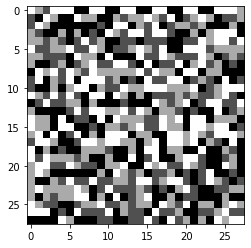

In [ ]:
npao = np.concatenate((np.asarray(images_motifs, dtype=np.float32),np.asarray(images_enhancers, dtype=np.float32) ))


npa = npao / 255
plt.imshow(npa[2], cmap='gray')

# <center> Defining the Labels

In [ ]:
labels = np.concatenate((np.ones(2500), np.zeros(2500)))
label=labels.reshape(5000,1)


# <center> Modified VGG 

In [ ]:
def make_cnn_vgg():
  inp = keras.Input(shape=(28,28,1))

  x = keras.layers.Conv2D(32, kernel_size=(3,3), padding='same', activation='relu')(inp)
  x = keras.layers.MaxPool2D()(x)

  x = keras.layers.Conv2D(64, kernel_size=(3,3), padding='same', activation='relu')(x)
  x = keras.layers.MaxPool2D()(x)

  x = keras.layers.Flatten()(x)

  x = keras.layers.Dense(100, activation='relu')(x)
  x = keras.layers.Dropout(0.3)(x)
  x = keras.layers.Dense(1, activation='sigmoid')(x)

  model = keras.Model(inp, x)
  model.summary()

  return model


def compile_fit_cnn(model, dataset):
  model.compile(loss='binary_crossentropy', optimizer=keras.optimizers.SGD(learning_rate=0.01, momentum=0), metrics=['accuracy'])
  hist = model.fit(dataset, label,epochs=200, batch_size=16, validation_split=0.2)
  return hist

def plot_loss_behavior(hist):
  plt.plot(hist.history['loss'],label='Training Loss')
  plt.plot(hist.history['val_loss'],label='Validation Loss')
  plt.legend()

def plot_accuracy(hist):
  plt.plot(hist.history['accuracy'],label='Training Accuracy')
  plt.plot(hist.history['val_accuracy'],label='Validation Accuracy')
  plt.legend()




In [ ]:
model = make_cnn_vgg()
hist = compile_fit_cnn(model, npa)


Model: "functional_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_17 (Dense)             (None, 100)             

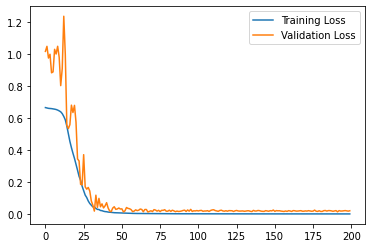

In [ ]:
plot_loss_behavior(hist)


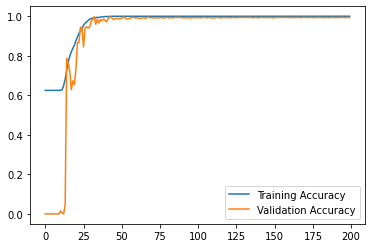

In [ ]:
plot_accuracy(hist)